<a href="https://colab.research.google.com/github/AhmadJalal789/Projects/blob/main/emotion_detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import required libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage import io, transform
from tensorflow.keras.layers import Flatten
import seaborn as sns
import matplotlib.pyplot as plt

#from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.applications import VGG16

import tensorflow as tf
import tensorflow_hub as hub
import cv2

import PIL.Image as Image
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential




In [9]:
# installing to unzip the rar file
!apt-get install unrar


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.6.6-2build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [10]:
# unzipping the rar file
!unrar x /content/Modelling.rar



UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/Modelling.rar


Would you like to replace the existing file Anger/photo 114.jpg
  5699 bytes, modified on 2023-02-26 10:16
with a new one
  5699 bytes, modified on 2023-02-26 10:16

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [11]:
# reading the image folders path in
anger_path = "/content/Anger"
fear_path = "/content/Fear"
neutral_path = "/content/Neutral"
stress_path = "/content/Stress"

In [12]:
# defing a function to read the images

def load_images(anger_path, fear_path,neutral_path,stress_path):
    data = []
    labels = []

    for file in os.listdir(anger_path):
        if file.endswith(".JPG"):
            img = io.imread(os.path.join(anger_path, file), as_gray=True)
            img = transform.resize(img, (224, 224,3))
            data.append(img)
            # giving zero label to anger images
            labels.append(0)

    for file in os.listdir(fear_path):
        if file.endswith(".JPG"):
            img = io.imread(os.path.join(fear_path, file), as_gray=True)
            img = transform.resize(img, (224,224,3))
            data.append(img)

            # giving one label to fear images
            labels.append(1)
    
    
    for file in os.listdir(neutral_path):
        if file.endswith(".JPG"):
            img = io.imread(os.path.join(neutral_path, file), as_gray=True)
            img = transform.resize(img, (224, 224,3))
            data.append(img)

            # giving 2 label to neutral images
            labels.append(2)

    for file in os.listdir(stress_path):
        if file.endswith(".JPG"):
            img = io.imread(os.path.join(stress_path, file), as_gray=True)
            img = transform.resize(img, (224, 224,3))
            data.append(img)

            # giving 3 label to stress images
            labels.append(3)
    

    data = np.array(data)
    data = data.reshape((data.shape[0], 224, 224,3))
    labels = np.array(labels)

    return data, labels

In [13]:
# reading the images from the folders
data, labels = load_images(anger_path, fear_path, neutral_path,stress_path)


In [14]:
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# CNN

## Without Data Augmentaition

We are going to use a pretrained model from tensor hub known as mobilenet base model which had been trained on millions of images

In [171]:
#adding pretrained model
model_from_tensorhub = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [172]:
Number_of_emotions=4    #number of emotions happy, anger etc

In [173]:
pretrained_base = hub.KerasLayer(
    model_from_tensorhub, input_shape=(224, 224, 3), trainable=False)   #here is the pretrained base

In [174]:
model_Unaugmented = tf.keras.Sequential([
  pretrained_base,
  tf.keras.layers.Dense(Number_of_emotions)
])

# here is the pretrained model with dense layer attached

In [175]:
model_Unaugmented.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),    #sparse categorical crosentropy is used because we have to classy more than 2 classes i.e 4
  metrics=['acc'])

model_Unaugmented.fit(X_train, y_train, epochs=15)


#here we have compiled the model

Epoch 1/15
4/4 [==============================] - 3s 45ms/step - loss: 1.4513 - acc: 0.3271
Epoch 2/15
4/4 [==============================] - 0s 42ms/step - loss: 1.2106 - acc: 0.5701
Epoch 3/15
4/4 [==============================] - 0s 36ms/step - loss: 1.0513 - acc: 0.5794
Epoch 4/15
4/4 [==============================] - 0s 36ms/step - loss: 0.9588 - acc: 0.6075
Epoch 5/15
4/4 [==============================] - 0s 34ms/step - loss: 0.9077 - acc: 0.6262
Epoch 6/15
4/4 [==============================] - 0s 33ms/step - loss: 0.8092 - acc: 0.6636
Epoch 7/15
4/4 [==============================] - 0s 34ms/step - loss: 0.7562 - acc: 0.6729
Epoch 8/15
4/4 [==============================] - 0s 33ms/step - loss: 0.7036 - acc: 0.6822
Epoch 9/15
4/4 [==============================] - 0s 33ms/step - loss: 0.6655 - acc: 0.7290
Epoch 10/15
4/4 [==============================] - 0s 34ms/step - loss: 0.6302 - acc: 0.7477
Epoch 11/15
4/4 [==============================] - 0s 33ms/step - loss: 0.6025 

In [176]:


model_Unaugmented.evaluate(X_test,y_test)

# calculating test score without data augmentation

1/1 [==============================] - 1s 554ms/step - loss: 1.3432 - acc: 0.5556


[1.3432177305221558, 0.5555555820465088]

## With Data Augmentation

In [177]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2)
])


In [178]:
image1=data_augmentation(X_train)

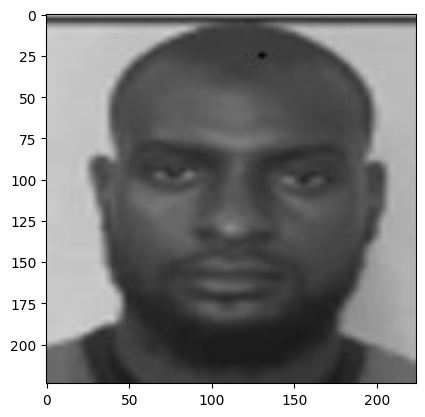

In [179]:
plt.imshow(X_train[0])  #here you can see the original image without any data augmentation

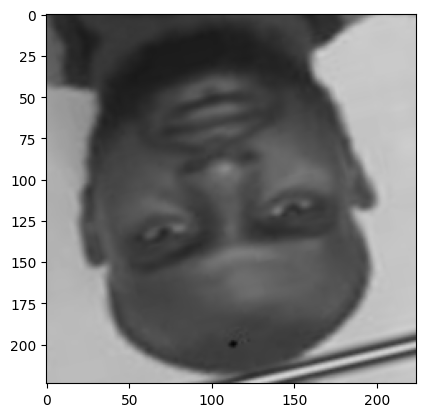

In [180]:
 plt.imshow(image1[0])  #here is the rotated version of above image after applying data augmentation

In [181]:
model_augmented= keras.Sequential([
    data_augmentation,   # addition of augmented layer
    # Base
    pretrained_base,
    # Head
    layers.Dense(Number_of_emotions)
])

In [182]:
model_augmented.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model_augmented.fit(X_train, y_train, epochs=15)

Epoch 1/15
4/4 [==============================] - 2s 47ms/step - loss: 1.8956 - acc: 0.2523
Epoch 2/15
4/4 [==============================] - 0s 48ms/step - loss: 1.3951 - acc: 0.5234
Epoch 3/15
4/4 [==============================] - 0s 41ms/step - loss: 1.3330 - acc: 0.5607
Epoch 4/15
4/4 [==============================] - 0s 41ms/step - loss: 1.3374 - acc: 0.5140
Epoch 5/15
4/4 [==============================] - 0s 41ms/step - loss: 1.1890 - acc: 0.5701
Epoch 6/15
4/4 [==============================] - 0s 39ms/step - loss: 1.0544 - acc: 0.6262
Epoch 7/15
4/4 [==============================] - 0s 40ms/step - loss: 1.0069 - acc: 0.5794
Epoch 8/15
4/4 [==============================] - 0s 41ms/step - loss: 1.0292 - acc: 0.5981
Epoch 9/15
4/4 [==============================] - 0s 41ms/step - loss: 0.9598 - acc: 0.6262
Epoch 10/15
4/4 [==============================] - 0s 38ms/step - loss: 0.9949 - acc: 0.6262
Epoch 11/15
4/4 [==============================] - 0s 41ms/step - loss: 0.9023 

## You can see that after data augmentation the test accuracy has increased from 55 to 62 percent which is a big improvement.

In [183]:
model_augmented.evaluate(X_test,y_test)


#calculating test score using data augmented layer , you can see that test score has increased...

1/1 [==============================] - 1s 557ms/step - loss: 1.0173 - acc: 0.6296


[1.0172836780548096, 0.6296296119689941]

## Here you can see the side by side score of test score (unaugmented data-model) and test score (augemented data-model1) in the form of bar plot 

In [185]:
plt.style.use('ggplot')

1/1 [==============================] - 0s 121ms/step - loss: 1.0173 - acc: 0.6296
Model_augmented Loss: 1.0172836780548096
Model_augmented Accuracy: 0.6296296119689941
1/1 [==============================] - 0s 112ms/step - loss: 1.3432 - acc: 0.5556
Model_Unaugmented Loss: 1.3432177305221558
Model_Unaugmented Accuracy: 0.5555555820465088


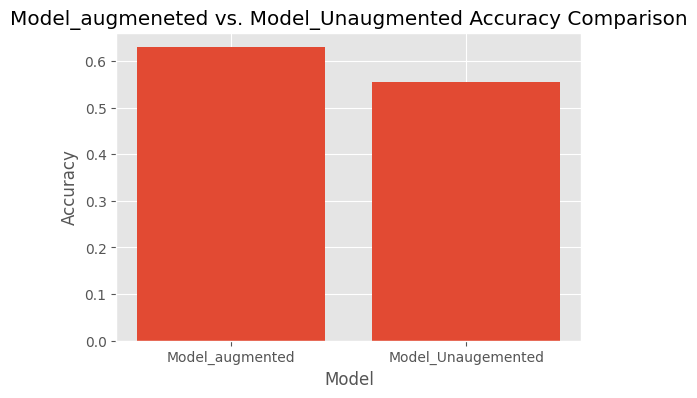

In [188]:
model_augmented_loss, model_augmented_acc = model_augmented.evaluate(X_test, y_test)
print("Model_augmented Loss:", model_augmented_loss)
print("Model_augmented Accuracy:", model_augmented_acc)

# Evaluate model
model_Unaugmented_loss, model_Unaugmented_acc = model_Unaugmented.evaluate(X_test, y_test)
print("Model_Unaugmented Loss:", model_Unaugmented_loss)
print("Model_Unaugmented Accuracy:", model_Unaugmented_acc)

# Plot comparison graph
plt.figure(figsize=(6, 4))
plt.bar(['Model_augmented', 'Model_Unaugemented'], [model_augmented_acc, model_Unaugmented_acc])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model_augmeneted vs. Model_Unaugmented Accuracy Comparison')
plt.show()